# Models Implementation

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import sklearn
from sklearn import tree
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [2]:
data = pd.read_csv("data_prep.csv", index_col="ID")

In [3]:
data.head()

LIMIT_BAL  FEMME  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
ID                                                                          
1       20000      1      2      2     -1     -1     -2     -2       3913   
2      120000      1     -1      2      0      0      0      2       2682   
3       90000      1      0      0      0      0      0      0      29239   
4       50000      1      0      0      0      0      0      0      46990   
5       50000      0     -1      0     -1      0      0      0       8617   

    BILL_AMT2  ...  Marriage_Others  Married  Divorce  Between 30 and 39 y.o  \
ID             ...                                                             
1        3102  ...                0        1        0                      0   
2        1725  ...                0        0        0                      0   
3       14027  ...                0        0        0                      1   
4       48233  ...                0        1        0                      1   
5        5670  ...                0        1        0                      0   

    Between 40 and 49 y.o  Between 50 and 59 y.o  Over 60 y.o  freq_def  \
ID                                                                        
1                       0                      0            0  0.333333   
2                       0                      0            0  0.333333   
3                       0                      0            0  0.000000   
4                       0                      0            0  0.000000   
5                       0                      1            0  0.000000   

         std_pay      std_bill  
ID                              
1     281.283072   1761.633219  
2     752.772653    637.967841  
3    1569.815488   6064.518593  
4     478.058155  10565.793518  
5   13786.230736  10668.590074  

[5 rows x 34 columns]

### Logistic Regression

In [74]:
#Splitting the dataset into a training set and testing set

X = data.drop("def_pay", axis=1)
y = data["def_pay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 42)

X_train.shape, X_test.shape

((21000, 33), (9000, 33))

In [5]:
#First model :  Logistic regression

parameters = {"C": np.logspace(-3,3,7),
              "penalty":["l1","l2"]}
lr = LogisticRegression(random_state = 42, solver = "liblinear")
logreg_search = GridSearchCV(lr, parameters, cv = 5)

logreg_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=18, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
logreg_search.best_params_

{'C': 100.0, 'penalty': 'l1'}

In [7]:
lr.set_params(**logreg_search.best_params_) #Put the best hyperparameters in our model
lr.fit(X_train,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=18, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
Best_LR = logreg_search.best_estimator_

In [9]:
joblib.dump(logreg_search.best_estimator_ ,'Best_LR' )

['Best_LR']

In [10]:
Best_LR = joblib.load('Best_LR')

In [27]:
ConfMatrix = confusion_matrix(y_test, Best_LR.predict(X_test))
ConfMatrix.

array([[6711, 1427],
       [ 298,  564]])

Accuracy :  0.8083333333333333

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7009
           1       0.65      0.28      0.40      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000



Average 5-Fold CV Score: 0.8075 , Standard deviation: 0.0074



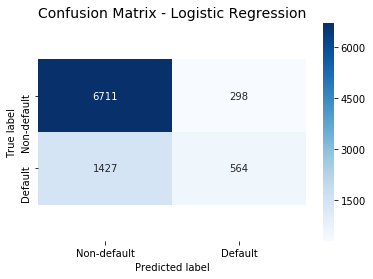

In [28]:
#Model Precision

y_pred = Best_LR.predict(X_test)
print('Accuracy : ', accuracy_score(y_pred, y_test))
print()
print(classification_report(y_test, y_pred))
print()

## 5-fold cross-validation 
cv_scores = cross_val_score(lr, X, y, cv=5)

print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
print()


ConfMatrix = confusion_matrix(y_test, Best_LR.predict(X_test))
ax = sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression", size = 14)
plt.show();

## Balanced

In [75]:
#First model :  Logistic regression

parameters = {"C": np.logspace(-3,3,7),
              "penalty":["l1","l2"]}
lr = LogisticRegression(random_state = 42, solver = "liblinear", class_weight = 'balanced')
logreg_search = GridSearchCV(lr, parameters, cv = 5)

logreg_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
logreg_search.best_params_

{'C': 0.001, 'penalty': 'l1'}

In [77]:
Best_LR = logreg_search.best_estimator_

In [79]:
ConfMatrix = confusion_matrix(y_test, Best_LR.predict(X_test))

Accuracy :  0.7735555555555556

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7009
           1       0.49      0.52      0.50      1991

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.68      9000
weighted avg       0.78      0.77      0.78      9000



Average 5-Fold CV Score: 0.7257 , Standard deviation: 0.0139



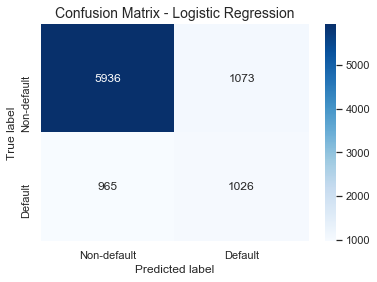

In [81]:
#Model Precision

y_pred = Best_LR.predict(X_test)
print('Accuracy : ', accuracy_score(y_pred, y_test))
print()
print(classification_report(y_test, y_pred))
print()

## 5-fold cross-validation 
cv_scores = cross_val_score(lr, X, y, cv=5)

print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
print()


ConfMatrix = confusion_matrix(y_test, Best_LR.predict(X_test))
ax = sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])

bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression", size = 14)
plt.show();

### Decision Tree

In [30]:
#Second model : Decision Tree

tree_clf = tree.DecisionTreeClassifier(random_state = 42)
tree_clf = tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test, y_pred)))
print('f1_score       : {}'.format(f1_score(y_test, y_pred)))

#à voir
#Accuracy Score : 0.7198888888888889
#f1_score       : 0.3920906679527369



Accuracy Score : 0.7273333333333334
f1_score       : 0.4072463768115942


In [47]:
#We search the best hyperparameters for our decision Tree

parameters = {'max_depth' : np.arange(2, 7, 1),
              "max_features": range(5, 15),
              'min_samples_leaf' : range(1,6), 
              "criterion": ["gini", "entropy"]}

tree_clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(tree_clf, parameters, scoring='accuracy', cv=5, n_jobs=-1,
                          verbose=1)

tree_search.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 2310 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   22.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                 

In [53]:
#Here are the best Hyperparameters
print(tree_search.best_params_)
best = tree_search.best_estimator_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 13, 'min_samples_leaf': 4}


In [54]:
#We save our model so that we do not have to search for the best hyperparameters each time
joblib.dump(best, "Best_Decision_Tree")

['Best_Decision_Tree']

In [55]:
Best_Decision_Tree = joblib.load("Best_Decision_Tree")

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Average 5-Fold CV Score: 0.8191 , Standard deviation: 0.0109



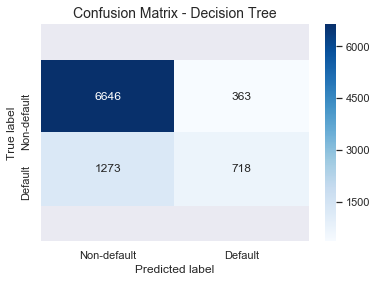

In [56]:
Best_Decision_Tree.fit(X_train, y_train)
y_pred = Best_Decision_Tree.predict(X_test)

cv_scores = cross_val_score(Best_Decision_Tree, X, y, cv = 5)

print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print()

ConfMatrix = confusion_matrix(y_test, Best_Decision_Tree.predict(X_test))
ax = sns.heatmap(ConfMatrix, annot = True, cmap = "Blues", fmt = "d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree", size = 14);



In [57]:
print('Accuracy:', '\ntrain : ', accuracy_score(y_train, Best_Decision_Tree.predict(X_train)), 
                   '\ntest  : ', accuracy_score(y_test,  Best_Decision_Tree.predict(X_test))
     )

print()

print('f1_score:', '\ntrain : ', f1_score(y_train, Best_Decision_Tree.predict(X_train)), 
                   '\ntest  : ', f1_score(y_test, Best_Decision_Tree.predict(X_test))
     )

Accuracy: 
train :  0.8242857142857143 
test  :  0.8182222222222222

f1_score: 
train :  0.48735759933314804 
test  :  0.4674479166666667


In [58]:
features = X_train.columns
features

Index(['LIMIT_BAL', 'FEMME', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Graduate School', 'University',
       'Education_Others', 'Marriage_Others', 'Married', 'Divorce',
       'Between 30 and 39 y.o', 'Between 40 and 49 y.o',
       'Between 50 and 59 y.o', 'Over 60 y.o', 'freq_def', 'std_pay',
       'std_bill'],
      dtype='object')

In [59]:
#Features importance
def get_feature_importance(classifier, features):
    importance = classifier.feature_importances_.tolist()
    result = pd.DataFrame({'Features': features, 'Feature Importance': importance})
    result = result.sort_values(by=['Feature Importance'], ascending=False)
    return result

In [60]:
get_feature_importance(best, features).head()

Features  Feature Importance
30   freq_def            0.754274
2       PAY_1            0.143982
16   PAY_AMT3            0.035480
8   BILL_AMT1            0.016601
14   PAY_AMT1            0.010428

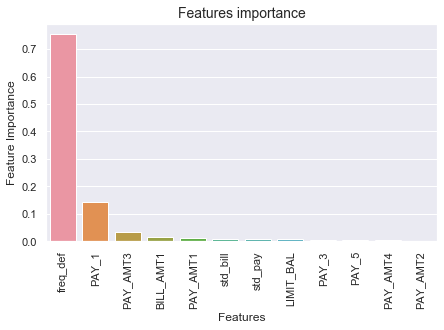

In [61]:
sns.set()

tmp = get_feature_importance(best, features)
tmp = tmp[tmp["Feature Importance"]>0]

plt.figure(figsize = (7,4))
plt.title('Features importance', fontsize=14)
s = sns.barplot(x = 'Features', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()  

### Random Forest

In [65]:
#Third Model : Random Forest

RF = RandomForestClassifier(max_depth=20, random_state=0,
                             n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test, y_pred)))
print('F1_score       : {}'.format(f1_score(y_test, y_pred)))
print('Recall       : {}'.format(recall_score(y_test, y_pred)))

#Accuracy Score : 0.8205
#Zero one loss  : 0.1795


#Faire graphique pour comparer les différents modèles
#Analyse d'erreurs

Accuracy Score : 0.8141111111111111
F1_score       : 0.4608443441830487
Recall       : 0.35911602209944754


In [67]:
parameters = {'max_depth' : [200, 250, 300], 
              'min_samples_leaf' : range(6, 15), 
              'min_samples_split' : range(2, 9), 
               "criterion": ["gini", "entropy"]}

tree_clf = RandomForestClassifier()
tree_search = GridSearchCV(tree_clf, parameters, scoring = 'accuracy', cv = 5, n_jobs = -1, 
                          verbose = 1)

tree_search.fit(X_train, y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1890 out of 1890 | elapsed:  2.3min finished
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [68]:
print(tree_search.best_params_)
bestRF = tree_search.best_estimator_

{'criterion': 'gini', 'max_depth': 300, 'min_samples_leaf': 14, 'min_samples_split': 3}


In [69]:
joblib.dump(bestRF, 'Best_RF')

['Best_RF']

In [70]:
bestRF = joblib.load('Best_RF')

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000


Average 5-Fold CV Score: 0.8165 , Standard deviation: 0.0082



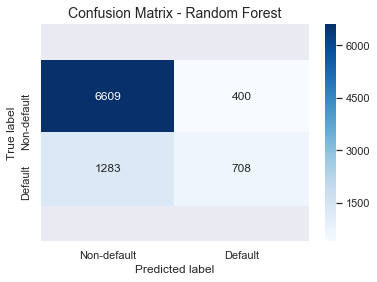

In [71]:
bestRF.fit(X_train, y_train)
y_pred = bestRF.predict(X_test)

cv_scores = cross_val_score(bestRF, X, y, cv = 5)

print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print()

ConfMatrix = confusion_matrix(y_test, bestRF.predict(X_test))
ax = sns.heatmap(ConfMatrix, annot = True, cmap = "Blues", fmt = "d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest", size = 14);

In [29]:
print('Accuracy:', '\ntrain : ', accuracy_score(y_train, bestRF.predict(X_train)), 
                   '\ntest  : ', accuracy_score(y_test, bestRF.predict(X_test))
     )

print('f1_score:', '\ntrain : ', f1_score(y_train, bestRF.predict(X_train)), 
                   '\ntest  : ', f1_score(y_test, bestRF.predict(X_test))
     )

Accuracy: 
train :  0.8569523809523809 
test  :  0.8103333333333333
f1_score: 
train :  0.5873626373626374 
test  :  0.4516543527144234


In [35]:
get_feature_importance(bestRF, features).head()

Features  Feature Importance
33  freq_def            0.172821
2      PAY_1            0.101666
6      PAY_5            0.058447
3      PAY_2            0.051209
35  std_bill            0.050889

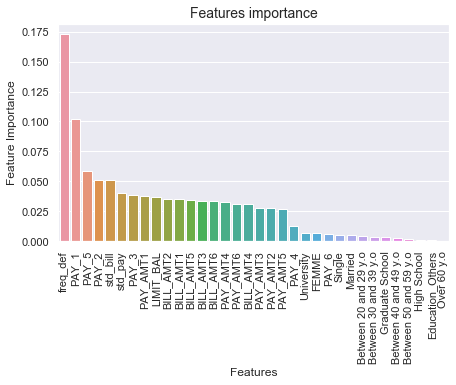

In [37]:
sns.set()

tmp = get_feature_importance(bestRF, features)
tmp = tmp[tmp["Feature Importance"]>0]

plt.figure(figsize = (7,4))
plt.title('Features importance', fontsize=14)
s = sns.barplot(x = 'Features', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()  

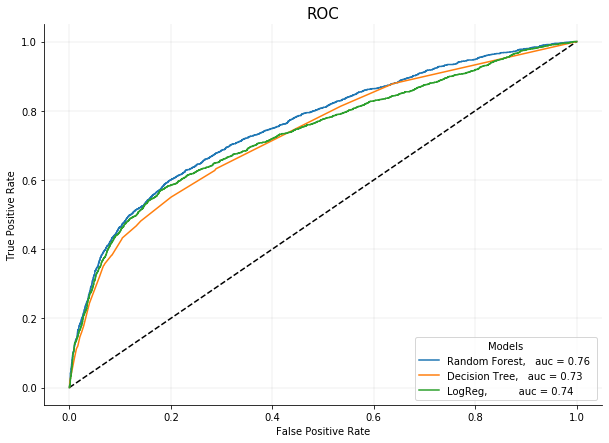

In [16]:
y_pred_proba_RF = bestRF.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba_RF)
auc1 = roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = Best_Decision_Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba_DT)
auc2 = roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = Best_LR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba_LR)
auc3 = roc_auc_score(y_test, y_pred_proba_LR)

fig, ax = plt.subplots(figsize = (10, 7))
#sns.set()
ax.plot([0, 1], [0, 1], '--k')
ax.plot(fpr1, tpr1, label = "Random Forest,   auc = {} ".format(str(round(auc1,2))))
ax.plot(fpr2, tpr2, label = "Decision Tree,   auc = {} ".format((round(auc2,2))))
ax.plot(fpr3, tpr3, label = "LogReg,          auc = {} ".format((round(auc3,2))))
ax.legend(loc = 4, title = 'Models', facecolor = 'white')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC', size = 15)

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adds major gridlines
ax.grid(color = 'grey', linestyle='-', linewidth=0.25, alpha=0.5)


In [25]:
from astropy.table import Table, Column
data_rows = [('Logistic Regression', 'original', 0.78, 0.81, 0.77),
              ('Decision Tree', 'original', 0.79, 0.81, 0.77),
             ('Random Forest', 'original', 0.80, 0.81, 0.79)
            ]
t = Table(rows=data_rows, names=('Model', 'Data', 'Precision', 'Recall', 'F1'))
print(t)

       Model          Data   Precision Recall  F1 
------------------- -------- --------- ------ ----
Logistic Regression original      0.78   0.81 0.77
      Decision Tree original      0.79   0.81 0.77
      Random Forest original       0.8   0.81 0.79


### Neural Network

In [35]:
import tensorflow.keras as tf
from mish import Mish

In [36]:
X_train_nn = np.asarray(X_train)
y_train_nn = np.asarray(y_train)
X_test_nn  = np.asarray(X_test)
y_test_nn  = np.asarray(y_test)

In [41]:
model = tf.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(128, activation = "Mish"))
model.add(tf.layers.Dense(128, activation = "Mish"))
model.add(tf.layers.Dense(2,   activation = "softmax"))

model.compile(optimiser = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(X_train_nn, y_train_nn, epochs = 5)

Train on 21000 samples
Epoch 1/5
21000/21000 [==============================] - 1s 55us/sample - loss: 998.5976 - accuracy: 0.6851
Epoch 2/5
21000/21000 [==============================] - 1s 36us/sample - loss: 144.2595 - accuracy: 0.6868
Epoch 3/5
21000/21000 [==============================] - 1s 34us/sample - loss: 25.9693 - accuracy: 0.6852
Epoch 4/5
21000/21000 [==============================] - 1s 34us/sample - loss: 6.2162 - accuracy: 0.6719
Epoch 5/5
21000/21000 [==============================] - 1s 34us/sample - loss: 0.8960 - accuracy: 0.7225


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  12032     
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  258       
Total params: 28,802
Trainable params: 28,802
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.save('NN_Classifier')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: NN_Classifier/assets


In [ ]:
#val_loss, val_accuracy = model.evaluate(X_test_nn, y_test_nn)

In [40]:
new_model = tf.models.load_model('NN_Classifier')
predictions = new_model.predict(X_test_nn)